# Amortisierte Analyse

<!--
#### 1. 
>   a)
    falsch
>   b)
    wahr
>   c)
    wahr
>   d)
    falsch
>   e)
    falsch
>   f)
    wahr
-->

#### 1. 
>   a)

In [3]:
class MyQueue:
    def __init__(self):
        self.stack1 = []
        self.stack2 = []

    def enqueue(self, elm):
        self.stack2.append(elm)

    def dequeue(self):
        if len(self.stack1) == 0:
            if len(self.stack2) == 0:
                return None
            while len(self.stack2) > 0:
                self.stack1.append(self.stack2.pop())
        return self.stack1.pop()

> b)
> $\mathcal{O}(n)$

> c)
Potenzialfunktion: $\Phi(n) = k - n$
    
> $n$ = Anzahl der Elemente im Stack, auf welchem bei der *dequeue*-Operation zugegriffen wird.
    
> Operation ohne Auskellern des anderen Stacks:

> $$
\begin{align*}
\hat{c}_i & = c_i + \Delta \Phi(D_i) \\
& = 1 + 1 \\
& = 2 \\
& \in \mathcal{O}(1)
\end{align*}
$$

> Operation mit Auskellern des anderen Stacks:

> $m$ = Anzahl der Elemente im anderen Stack

> $$
\begin{align*}
\hat{c}_i & = c_i + \Delta \Phi(D_i) \\
& = c_i + \Phi(D_i) - \Phi(D_{i-1}) \\
& = (m + 1) + (k - (m + 1)) - k \\
& = 2 \\
& \in \mathcal{O}(1)
\end{align*}
$$
<div style="text-align: right; font-size: 24px;">&#9633;</div>

#### 2.
> a)

> push(x): $\mathcal{O}(1)$

> pop(): $\mathcal{O}(1)$

> multipop(k): $\mathcal{O}(k)$

> b)

> Potenzialfunktion: $\Phi(n) = n$

> $n$ = Anzahl der Elemente die sich momentan auf dem Stack befinden.

> __push(x)__:

> $$
\begin{align*}
\hat{c}_i & = c_i + \Delta \Phi(D_i) \\
& = 1 + 1 \\
& = 2 \\
& \in \mathcal{O}(1)
\end{align*}
$$

> __pop()__:

> $$
\begin{align*}
\hat{c}_i & = c_i + \Delta \Phi(D_i) \\
& = 1 - 1 \\
& = 0 \\
& \in \mathcal{O}(1)
\end{align*}
$$

> __multipop(k)__:

> $$
\begin{align*}
\hat{c}_i & = c_i + \Delta \Phi(D_i) \\
& = c_i + \Phi(D_i) -  \Phi(D_{i-1})\\
& = k + n - (n - k) \\
& = 0 \\
& \in \mathcal{O}(1)
\end{align*}
$$
<div style="text-align: right; font-size: 24px;">&#9633;</div>

#### 3. Anagramm-Prüfer

Verfahren 1:  Brute force via Permutationen
True
False
Verfahren 2:  Scannen aller Zeichen
True
False
False
Verfahren 3:  Sortieren und Vergleichen
True
False
Verfahren 4:  Zählen und Vergleichen
True
False
Verfahren 5:  Vergleich der zugehörigen IDs
True
False


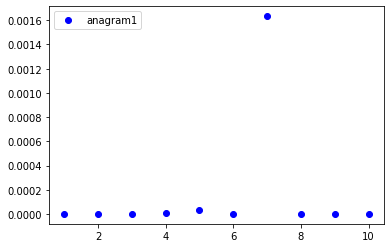

           2
9.481e-08 x - 3.772e-06 x + 4.588e-05


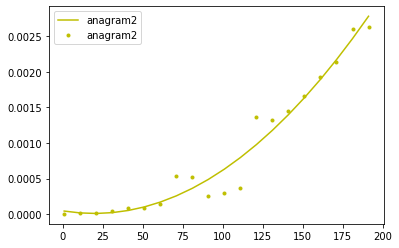

C:\Users\CW\Anaconda3\lib\site-packages\ipykernel_launcher.py:232: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


           2
1.615e-10 x + 3.899e-07 x + 0.0001719


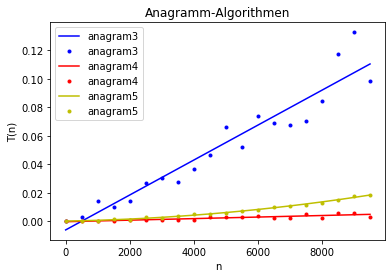

In [4]:
##  Anagramm-Prüfer

#  Ein Anagramm bezeichnet ein Wort, das aus einem anderen Wort
#  durch Umstellung einzelner Zeichen gebildet wird.

#  Verabredung: Es werden nur Kleinbuchstaben des deutschen Alphabets verwendet.

## Lösung 1:
#    Bilden aller Permutationen des ersten Wortes und prüfen,
#    ob das zweite Wort in dieser Menge vorkommt

#  Paket einmalig installieren: Eingabefenster, pip install matplotlib
#  Paketverwaltung mit pip: https://pip.pypa.io/en/stable/

import random
import timeit
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations


def anagram1(str1, str2):
    '''Brute force via Permutationen'''
    perm_iterator = permutations(str2)
    for item in perm_iterator:
        if tuple(str1) == item:            
            return True
    return False
	
## Erzeugung der Permutationen 
# >>> pm = permutations('abc')
# >>> for i in pm:
#        print(i)
# ('a', 'b', 'c')
# ('a', 'c', 'b')
# ('b', 'a', 'c')
# ('b', 'c', 'a')
# ('c', 'a', 'b')
# ('c', 'b', 'a')

print('Verfahren 1: ', anagram1.__doc__)  # Direktzugriff auf den Doc-String (Brute force ...)

print(anagram1('bbbaswqdxjxasasasmwndwdaacccd', 'bbbaswqdxjxasasasmwndwdaacccd'))
print(anagram1('bbbaaacccd', 'aabbbcccd'))

# Effizienz: n! Permutationen (n=|w|), Stirlingsche Formel: O(n^n)

## ------------------------------------------

## Lösung 2:
#    Zeichenweiser Vergleich bei gleicher Länge

def anagram2(str1, str2):
    '''Scannen aller Zeichen'''
    l_str1 = len(str1)
    l_str2 = len(str2)
    if l_str1 != l_str2: return False
    ls2 = list(str2)
    for i in range(l_str1):       # range(0,4) = 0,1,2,3
        for j in range(l_str2):
            if str1[i] == ls2[j]:
                ls2[j] = None
                break
        else:  # wenn Schleife nicht mit break verlassen wurde
            return False
    return True

print('Verfahren 2: ', anagram2.__doc__)

print(anagram2('bbbaaaeeecccddd', 'aaaebebbceccddd'))
print(anagram2('bbbaaacccd', 'aabbbcccd'))
print(anagram2('bbbaaacccd', 'bbbaaacccda'))

# Effizienz: Längen bestimmen: O(n), Vergleiche: n+(n-1)+...+1=O(n^2)
#            Gesamtaufwand: O(n^2)
    
## ------------------------------------------

## Lösung 3:
#    Sortieren und Vergleichen

def mergeSort(alist):

   if len(alist)>1:
       mid = len(alist)//2
       lefthalf = alist[:mid]
       righthalf = alist[mid:]

       #recursion
       mergeSort(lefthalf)
       mergeSort(righthalf)

       i=0
       j=0
       k=0

       while i < len(lefthalf) and j < len(righthalf):
           if lefthalf[i] < righthalf[j]:
               alist[k]=lefthalf[i]
               i=i+1
           else:
               alist[k]=righthalf[j]
               j=j+1
           k=k+1

       while i < len(lefthalf):
           alist[k]=lefthalf[i]
           i=i+1
           k=k+1

       while j < len(righthalf):
           alist[k]=righthalf[j]
           j=j+1
           k=k+1

#alist = [54,26,93,17,77,31,44,55,20]
#mergeSort(alist)
#print(alist)

def anagram3(str1, str2):
    '''Sortieren und Vergleichen'''
    a = list(str1)
    b = list(str2)
    #a.sort()  # Achtung: in place sort
    #b.sort()  # Achtung: in place sort
    mergeSort(a)
    mergeSort(b)
    return a == b

print('Verfahren 3: ', anagram3.__doc__)

print(anagram3('bbbaaaeeecccddd', 'aaaebebbceccddd'))
print(anagram3('bbbaaacccd', 'aabbbcccd'))

# Effizienz: Worst case Aufwand für das Sortieren: O(n log n). Zzgl. n Zeichen-Vergleiche
#    Gesamtaufwand: O(n log n)

# Verwendet man das in Python eingebaute Sortierverfahren (seit 2002: TimSort), so bleibt zwar ein 
#    Gesamtaufwand in O(n log n) im worst case 
# aber die Kurve verläuft wesentlich flacher: Timsort (Tim Peters) ist ein adaptives Sortierverfahren, 
# d.h. es profitiert von der Sortierung von Teilfolgen.
# Sortierte Teilfolgen (ggf. sehr geringer Länge) kommen in der Praxis durchaus vor.
# Es ist ein hybrides Verfahren, denn es verwendet Merge- und Insertionsort. Implementation: in-place
    
## ------------------------------------------

## Lösung 4:
#    Zählen und Vergleichen

def anagram4(str1, str2):
    '''Zählen und Vergleichen'''
    c1 = [0]*26
    c2 = [0]*26
    for i in range(len(str1)):
        pos = ord(str1[i])-97  # ord('a')=97
        c1[pos]+=1
    for i in range(len(str2)):
        pos = ord(str2[i])-97  # ord('a')=97
        c2[pos]+=1
    for i in range(26):
        if c1[i] != c2[i]:
            return False
    return True

print('Verfahren 4: ', anagram4.__doc__)

print(anagram4('bbbaaaeeecccddd', 'aaaebebbceccddd'))
print(anagram4('bbbaaacccd', 'aabbbcccd'))

# Effizienz: n Einträge in c1: O(n); n Einträge in c2: O(n)
#   n Vergleiche c1(i)==c2(i)? liegt in n*O(1)=O(n); 
# Gesamtaufwand: O(n)
# Verfahren 4 ist das effizienteste der hier betrachteten fünf Programme

## ------------------------------------------

## Lösung 5:
#    Hauptsatz der Arithmetik: eindeutige Primfaktorzerlegung
#    Berechnen und Vergleichen

def string2number(str):
    char2prime = {'a':2, 'b':3, 'c':5, 'd':7,
    'e':11, 'f':13, 'g':17, 'h':19, 'i':23, 'j':29, 'k':31, 'l':37,
    'm':41, 'n':43, 'o':47, 'p':53, 'q':59, 'r':61, 's':67, 't':71,
    'u':73, 'v':79, 'w':83, 'x':89, 'y':97, 'z':101}  # dictionary
    n = 1
    for char in str:              # O(n)
        n = n * char2prime[char]  # n*O(1)=O(n*1)=O(n) (Zugriff auf Dictionary-Elem.: O(1))
    return n                      # ergibt n*O(n)=O(n^2)

def anagram5(str1, str2):
    '''Vergleich der zugehörigen IDs'''
    return string2number(str1) == string2number(str2)

print('Verfahren 5: ', anagram5.__doc__)

print(anagram5('hallo', 'lalho'))
print(anagram5('hallo', 'lalio'))

# Effizienz: O(n^2)

## ========================================================

## Laufzeitmessungen, Analysen und grafische Darstellungen

# Funktion zur Ermittlung der Laufzeiten T(n) in Abhängigkeit von der Problemgröße n

def analyze(fn, maxi=10000, step=500):
    '''Funktion zur Ermittlung der Laufzeiten T(n) in Abhängigkeit von der Problemgröße n'''
    tx = []
    ty = []
    global n  # Damit es im Timer verwendet werden kann
    for n in range(1, maxi, step):   # Wortlängen n  (Problemgröße)
        tt = []
        for i in range(10):   # Anzahl k der Instanzen für jedes n
            v = fn + '(w[0],w[1])'
            t = timeit.Timer(v, 'gc.enable(); \
                from __main__ import ' + fn + ', randomwords, n; \
                w = randomwords(n)')  # wie eval
            tt = tt + [t.timeit(number=1)]
        tt.reverse()      # worst case; falls best case gesucht: sort()
        tx.append(n)
        ty.append(tt[0])  # ist das Maximum der Zeitenliste
    return tx, ty

# Lineare Regression

def linRegression(xs, ys):
    xi = np.array(xs)
    yi = np.array(ys)
    A = np.array([xi, np.ones(len(xi))])
    w = np.linalg.lstsq(A.T, yi)[0]
    line = w[0]*xi + w[1]
    return line

# Polynomapproximation

def polynomApprox(xs, ys, degree=2):
    xi = np.array(xs)
    yi = np.array(ys)
    return np.poly1d(np.polyfit(xi, yi, degree))

# Funktion zur Erzeugung von Zufallswörtern der Länge n

def randomwords(n):  # n > 0
    '''erzeugt zwei gleiche oder sich im letzten Zeichen unterscheidende Wörter der Länge n'''
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    w1 = ''    # Erzeugung eines Zufallswortes der Länge n
    for i in range(n):    
        w1 += random.choice(alphabet)
    w2 = w1  # per Wertkopie (nicht Referenz)
    if random.randint(0,1) == 1:   # 0 <= j <= 1
        w2 = w2[0:len(w2)-1] + random.choice(alphabet)
    return w1, w2


# Anagramm 1

plt.figure('Verfahren 1')
result = analyze('anagram1', 11, 1)
plt.plot(result[0], result[1], 'bo', label='anagram1')
plt.legend(loc='upper left')
plt.show()

# Anagramm 2

plt.figure('Verfahren 2')
result = analyze('anagram2', 200, 10)
poly = polynomApprox(result[0], result[1])  # opt. 3. Par.: Grad des Polynoms (Vorgabe: 2)
print(poly)  # z.B.: 6.414e-08 x^2 + 5.949e-07 x + 2.689e-06
plt.plot(result[0], poly(result[0]), 'y-', result[0], result[1], 'y.', label='anagram2')
plt.legend(loc='upper left')
plt.show()

# Anagramme 3, 4 und 5

plt.figure('Verfahren 3, 4 und 5')
plt.title('Anagramm-Algorithmen')
plt.xlabel('n')
plt.ylabel('T(n)')

result = analyze('anagram3')
regline = linRegression(result[0], result[1])
plt.plot(result[0], regline, 'b-', result[0], result[1], 'b.', label='anagram3')

result = analyze('anagram4')
regline = linRegression(result[0], result[1])
plt.plot(result[0], regline, 'r-', result[0], result[1], 'r.', label='anagram4')

result = analyze('anagram5')
poly = polynomApprox(result[0], result[1])  # opt. 3. Par.: Grad des Polynoms (Vorgabe: 2)
print(poly)  # 5.996e-10 x^2 + 5.925e-07 x - 8.899e-05
plt.plot(result[0], poly(result[0]), 'y-', result[0], result[1], 'y.', label='anagram5')
plt.legend(loc='upper left')
plt.show()

